 # Exploratory data analysis of datasets

This notebook will create and present datasets.

## Initial loading of libraries

In [13]:
# Import required libraries and modules.
import kagglehub
from imutils import paths
from matplotlib import pyplot as plt
import cv2
import random
import json
import shutil
import os

## NRE dataset

Since I couldn't find a suitable dataset, I decided to generate one.

In [3]:
# Define animals and context words.
animal_names = ["butterfly", "cat", "chicken", "cow", "dog", "elephant", "horse", "sheep", "spider", "squirrel"]
templates = [
    "The {animal} is found in {location}.",
    "A {animal} can {action}.",
    "Look at that {animal}!",
    "The {animal} eats {food}.",
    "In the wild, {animal} {action}.",
    "My favorite animal is the {animal}.",
    "There is a {animal} in the picture.",
    "I see a {animal}.",
    "Is that a {animal}?",
    "This image contains a {animal}.",
    "Look at the {animal}!"
]
locations = ["Africa", "forests", "mountains", "farms", "urban areas"]
actions = ["run", "jump", "swim", "climb", "fly", "hunt"]
foods = ["plants", "insects", "grass", "fish", "seeds"]

In [4]:
# A function for generating sentences.
def generate_sentence():
    template = random.choice(templates)
    animal = random.choice(animal_names)
    replacements = {
        "location": random.choice(locations),
        "action": random.choice(actions),
        "food": random.choice(foods)
    }
    sentence = template.format(animal=animal, **replacements)
    tokens = sentence.split()
    tags = [1 if token.lower() == animal.lower() else 0 for token in tokens]
    return {"tokens": tokens, "ner_tags": tags}

In [5]:
# Function for generating a dataset.
def generate_dataset(name, num_samples):
    sentences = [generate_sentence() for _ in range(num_samples)]
    dataset_dict = {"tokens": [s["tokens"] for s in sentences], "ner_tags": [s["ner_tags"] for s in sentences]}
    # Save dataset to JSON.
    with open(name, "w") as f:
        json.dump(dataset_dict, f)

In [6]:
# Generate dataset.
generate_dataset("./ner/animal_ner_dataset_train.json", 8000)
generate_dataset("./ner/animal_ner_dataset_val.json", 2000)
print("Datasets saved.")

Datasets saved.


## Image classification dataset

For training the animal classification model, https://www.kaggle.com/datasets/alessiocorrado99/animals10 was chosen.

In [7]:
# Download this dataset.
path = kagglehub.dataset_download("alessiocorrado99/animals10")

100%|██████████| 586M/586M [00:18<00:00, 32.6MB/s] 

Extracting files...


Here we take and copy the downloaded dataset, change the name. And then translate the folder names into English.

In [8]:
# New path and name for dataset.
dest_path = "./image_classifier/"
new_dir_name = "image_dataset"

In [9]:
# Ensure the destination directory exists.
if not os.path.exists(dest_path):
    os.makedirs(dest_path)

In [10]:
# Define the new directory path.
new_dir_path = os.path.join(dest_path, new_dir_name)

In [11]:
# Copy the directory.
shutil.copytree(path, new_dir_path)

'./image_classifier/image_dataset'

In [12]:
# Translate the folder names.
from image_classifier.image_dataset.translate import translate

# Define the path to the raw images directory.
raw_img_path = new_dir_path + "/raw-img"

# Iterate over each folder in the raw images directory.
for folder_name in os.listdir(raw_img_path):
    # Check if the folder name is in the translation dictionary.
    if folder_name in translate:
        # Get the translated folder name.
        translated_name = translate[folder_name]

        # Define the full paths for the current and new folder names.
        current_folder_path = os.path.join(raw_img_path, folder_name)
        new_folder_path = os.path.join(raw_img_path, translated_name)

        # Rename the folder.
        os.rename(current_folder_path, new_folder_path)
        print(f"Renamed '{folder_name}' to '{translated_name}'")

Renamed 'cane' to 'dog'
Renamed 'cavallo' to 'horse'
Renamed 'elefante' to 'elephant'
Renamed 'farfalla' to 'butterfly'
Renamed 'gallina' to 'chicken'
Renamed 'gatto' to 'cat'
Renamed 'mucca' to 'cow'
Renamed 'pecora' to 'sheep'
Renamed 'scoiattolo' to 'squirrel'


In [14]:
# Initialize lists for image data and labels.
data = []
labels = []

In [15]:
# Get all image paths and shuffle them for randomness.
image_paths = sorted(list(paths.list_images("./image_classifier/image_dataset/raw-img")))
random.seed(1)
random.shuffle(image_paths)
animals = ["butterfly", "cat", "chicken", "cow", "dog", "elephant", "horse", "ragno", "sheep", "squirrel"]
animal_images = {}

In [16]:
# Create a list of images and labels for animal.
for animal in animals:
    animal_images[animal] = []
for imagePath in image_paths:
    label = imagePath.split(os.path.sep)[-2]
    if label in animals:
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (227, 227))
        animal_images[label].append(image)
        data.append(image)
        labels.append(label)

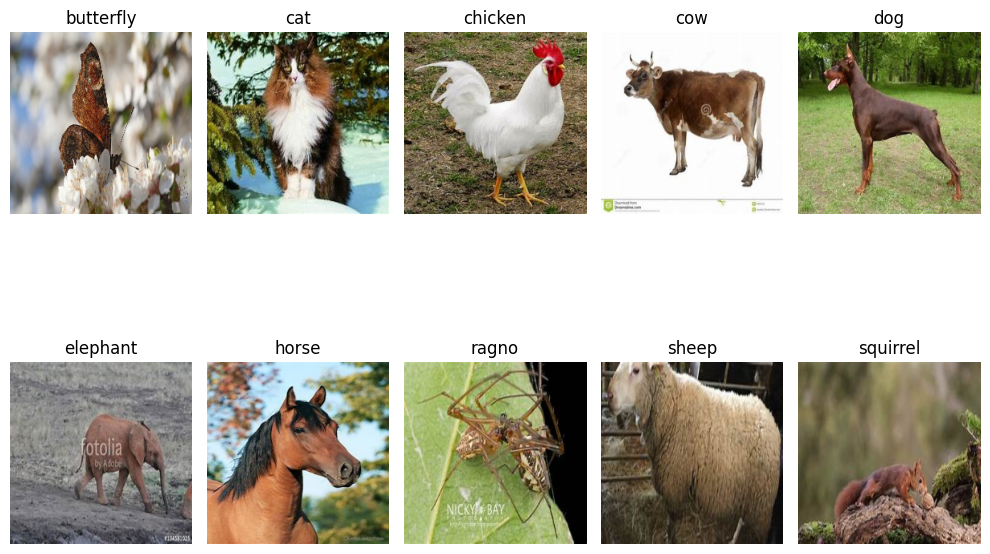

In [19]:
# Output one image for each animal.
plt.figure(figsize=(10, 8))
for i, animal in enumerate(animals):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor(animal_images[animal][1], cv2.COLOR_BGR2RGB))
    plt.title(animal)
    plt.axis('off')
plt.tight_layout()
plt.show()